In [249]:
import pandas as pd
import numpy as np
import seaborn as sb
from pandas import DataFrame

In [250]:
df=pd.read_csv('scores_data.csv')

df=DataFrame(df)
df

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7
...,...,...,...
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7


In [251]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [253]:
df.columns=df.columns.str.replace(' ','')


In [254]:
Scores=[]
for i in df['Score']:
    Scores.append(i[0])
df['Scores']=Scores
df

,Batch,User_ID,Score,Scores
0,AI_ELITE_7,uid_149,6 / 7,6
1,AI_ELITE_7,uid_148,6 / 7,6
2,AI_ELITE_7,uid_147,7 / 7,7
3,AI_ELITE_7,uid_146,7 / 7,7
4,AI_ELITE_7,uid_145,4 / 7,4
...,...,...,...,...
144,AI_ELITE_4,uid_5,4 / 7,4
145,AI_ELITE_4,uid_4,4 / 7,4
146,AI_ELITE_4,uid_3,4 / 7,4
147,AI_ELITE_4,uid_2,3 / 7,3


In [255]:
df['Scores']=df['Scores'].astype('float')

<AxesSubplot:ylabel='Density'>

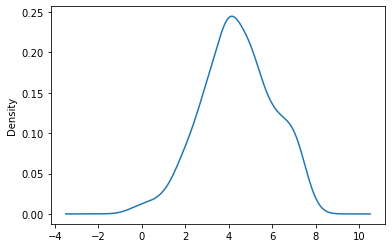

In [256]:
#Univariate analysis of Scores feature
df['Scores'].plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

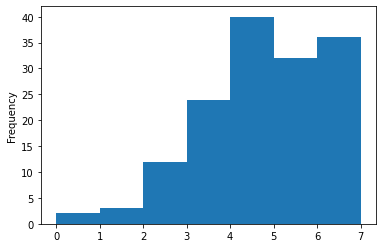

In [257]:
df['Scores'].plot(kind='hist',bins=7)

C:\Users\krant\anaconda_new\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\krant\anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


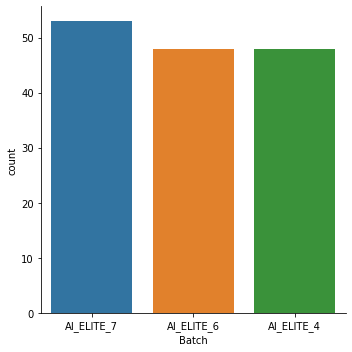

In [258]:
#Univariate Analysis of Batch
sb.factorplot('Batch',data=df,kind='count')

In [268]:
#Bivariate Analysis of BatchId Vs Scores
df['Batch'].value_counts(),'          ',clean_df['Batch'].value_counts()

(AI_ELITE_7    53
 AI_ELITE_6    48
 AI_ELITE_4    48
 Name: Batch, dtype: int64,
 '          ',
 AI_ELITE_7    41
 AI_ELITE_6    37
 AI_ELITE_4    36
 Name: Batch, dtype: int64)

<AxesSubplot:xlabel='Batch', ylabel='Scores'>

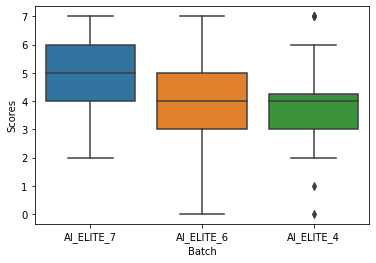

In [242]:
sb.boxplot(data=df,x='Batch',y='Scores')


In [243]:
[df['Scores'].max(),df['Scores'].min(),"{:.2f}".format(df['Scores'].mean()),df['Scores'].median(),df['Scores'].std()]

[7.0, 0.0, '4.38', 4.0, 1.5921993773540153]

In [301]:
clean_df['Scores'].value_counts(),'          ',df['Batch'].value_counts(),"         ",clean_df['Batch'].value_counts()

(4.0    40
 5.0    32
 3.0    24
 6.0    18
 7.0    18
 2.0    12
 Name: Scores, dtype: int64,
 '          ',
 AI_ELITE_7    53
 AI_ELITE_6    48
 AI_ELITE_4    48
 Name: Batch, dtype: int64,
 '         ',
 AI_ELITE_7    53
 AI_ELITE_4    46
 AI_ELITE_6    45
 Name: Batch, dtype: int64)

<AxesSubplot:xlabel='Batch', ylabel='Scores'>

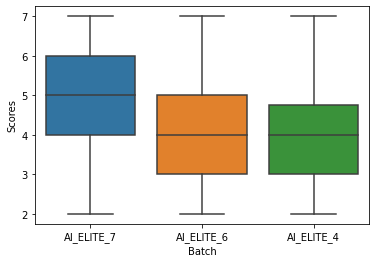

In [295]:
clean_df=df[(df.Scores <=7) & (df.Scores >1)]
sb.boxplot(data=clean_df,x='Batch',y='Scores')


# Insights from the data
#AI_ELITE_7 has performed best performed and AI_ELITE_4 is the least perfromed
#Also most students scored 4 and minimum score of 0 and maximum of 7